(<matplotlib.image.AxesImage at 0x1f3e9fe03d0>, (-0.5, 299.5, 249.5, -0.5))

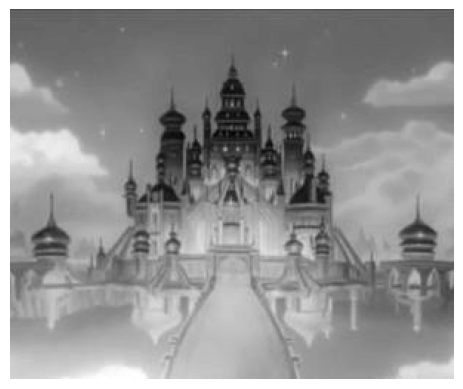

In [42]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

os.system('cls')

#read img
img = plt.imread('castle.jpg')
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray'), plt.axis('off')

(<AxesSubplot:title={'center':'7x7'}>,
 (-0.5, 299.5, 249.5, -0.5),
 Text(0.5, 1.0, '7x7'))

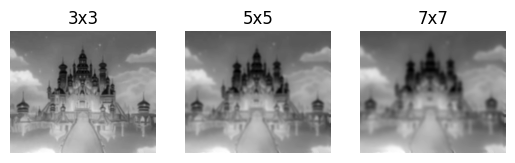

In [34]:
def conv(img, size = 3, weight = 1):
    new = img
    fil = np.full((size, size), weight)
    (a,b) = fil.shape
    (x,y) = img.shape
    padding = np.pad(img, [(a, a),(b, b)], mode='constant')
    fil = fil/np.sum(fil)
    for i in range(x-a):
        for j in range(y-b):
            sum = np.int8(0)
            for m in range(a):
                for n in range(b):
                    mul = padding[i+n+a,j+m+b]*fil[m,n]
                    sum = sum + mul
            new[i,j] = sum
    return new

plt.subplot(1,3,1), plt.imshow(conv(gray, 3, 1), cmap='gray'), plt.axis('off'), plt.title('3x3')
plt.subplot(1,3,2), plt.imshow(conv(gray, 5, 1), cmap='gray'), plt.axis('off'), plt.title('5x5')
plt.subplot(1,3,3), plt.imshow(conv(gray, 7, 1), cmap='gray'), plt.axis('off'), plt.title('7x7')

(<AxesSubplot:title={'center':'Box'}>,
 (-0.5, 299.5, 249.5, -0.5),
 Text(0.5, 1.0, 'Box'))

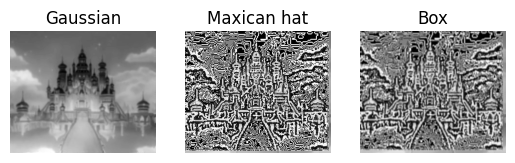

In [43]:
def conv_default(img, fil):
    new = img
    (a,b) = fil.shape
    (x,y) = img.shape
    padding = np.pad(img, [(a, a),(b, b)], mode='constant')
    if np.sum(fil) != 0:
        fil = fil/np.sum(fil)
    for i in range(x-a):
        for j in range(y-b):
            sum = np.int8(0)
            for m in range(a):
                for n in range(b):
                    mul = padding[i+n+a,j+m+b]*fil[m,n]
                    sum = sum + mul
            new[i,j] = sum
            # clip the value in range 0-255
    output = np.clip(new, a_min = 0, a_max = 255)
    return new

Gaussian = np.array([[1,4,7,4,1],
                    [4,16,26,16,4],
                    [7,26,41,26,7],
                    [4,16,26,16,4],
                    [1,4,7,4,1]])
Maxican = np.array([[0,0,-1,0,0],
                    [0,-1,-2,-1,0],
                    [-1,-2,16,-2,-1],
                    [0,-1,-2,-1,0],
                    [0,0,-1,0,0]])
Box =     np.array([[0,0,0,0,0],
                    [0,1,1,1,0],
                    [1,1,1,1,0],
                    [0,1,1,1,0],
                    [0,0,0,0,0]])

plt.subplot(1,3,1), plt.imshow(conv_default(gray, Gaussian), cmap='gray'), plt.axis('off'), plt.title('Gaussian')
plt.subplot(1,3,2), plt.imshow(conv_default(gray, Maxican), cmap='gray'), plt.axis('off'), plt.title('Maxican hat')
plt.subplot(1,3,3), plt.imshow(conv_default(gray, Box), cmap='gray'), plt.axis('off'), plt.title('Box')